# Keras TensorFlow 2.0 - Breast Cancer Diagnostic_Classification_UseCase

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Exploring the Data

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

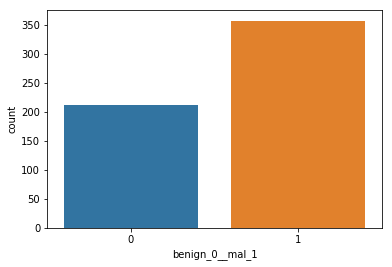

In [6]:
#classification problem

sns.countplot(x='benign_0__mal_1',data=df)

#relatively well balanced

In [8]:
#correlation in relation to benign/malignant

df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

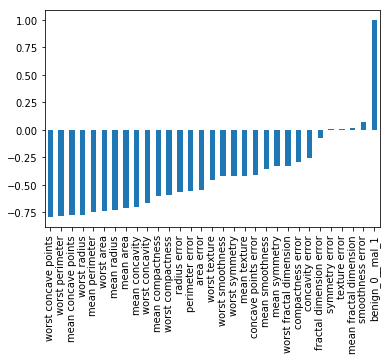

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

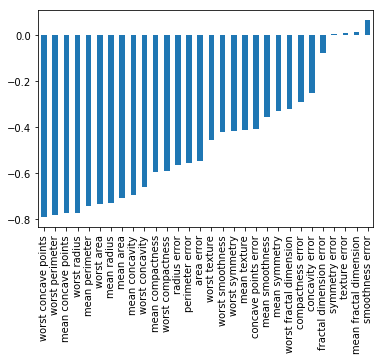

In [10]:
#drop last record

df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

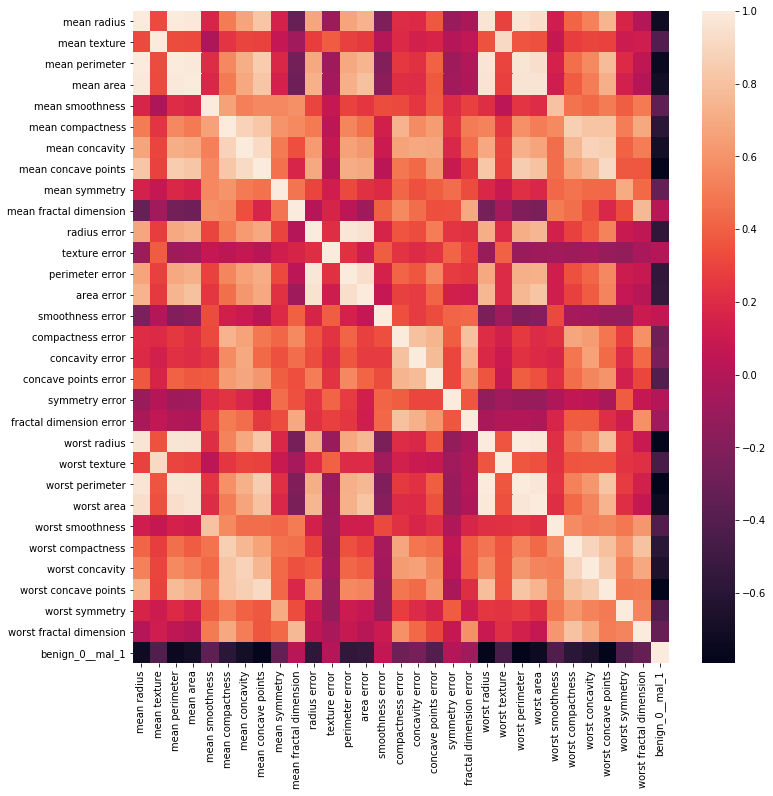

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

## Train Test Split

In [25]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [32]:
X_train = scaler.transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [35]:
X_train.shape

(426, 30)

In [36]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))

# For a binary classification problem - last activation = sigmoid
model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### epochs=600 without Early Stopping

In [37]:

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6857 - val_loss: 0.6758
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6596 - val_loss: 0.6537
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6372 - val_loss: 0.6291
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6085 - val_loss: 0.5985
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5732 - val_loss: 0.5588
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5333 - val_loss: 0.5156
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4914 - val_loss: 0.4724
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4503 - val_loss: 0.4316
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4140 - val_loss: 0.3894
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3763 - val_loss: 0.3539
Epoch 11

14/14 [==============================] - 0s 2ms/step - loss: 0.0589 - val_loss: 0.1141
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0586 - val_loss: 0.1227
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0565 - val_loss: 0.1169
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.1199
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0501 - val_loss: 0.1150
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0499 - val_loss: 0.1186
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0496 - val_loss: 0.1159
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0494 - val_loss: 0.1163
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.1154
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0484 - val_loss: 0.1247
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0372 - val_loss: 0.1327
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0362 - val_loss: 0.1288
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0348 - val_loss: 0.1318
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0374 - val_loss: 0.1360
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0406 - val_loss: 0.1310
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0361 - val_loss: 0.1279
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0349 - val_loss: 0.1362
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0339 - val_loss: 0.1321
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0337 - val_loss: 0.1332
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0340 - val_loss: 0.1364
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0279 - val_loss: 0.1453
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0253 - val_loss: 0.1469
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0261 - val_loss: 0.1498
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0269 - val_loss: 0.1490
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0250 - val_loss: 0.1503
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0249 - val_loss: 0.1503
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0257 - val_loss: 0.1488
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0279 - val_loss: 0.1541
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0247 - val_loss: 0.1466
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0271 - val_loss: 0.1527
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0188 - val_loss: 0.1795
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0186 - val_loss: 0.1774
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0189 - val_loss: 0.1833
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0186 - val_loss: 0.1763
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 0.1765
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0288 - val_loss: 0.2013
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0284 - val_loss: 0.1730
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0277 - val_loss: 0.1926
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0215 - val_loss: 0.1717
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0170 - val_loss: 0.1820
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.2151
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.2091
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.2224
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0125 - val_loss: 0.2088
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0128 - val_loss: 0.2147
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0120 - val_loss: 0.2165
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.2150
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0119 - val_loss: 0.2135
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0176 - val_loss: 0.2413
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0206 - val_loss: 0.2189
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.2763
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.2490
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.2487
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.2785
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.2497
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.2556
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0109 - val_loss: 0.2523
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.2573
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.2881
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.2648
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.2959
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.2974
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.2929
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.2899
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.2950
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.2962
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.3001
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.2917
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.2966
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.2929
Epoc

In [39]:
#model.history.history

In [40]:
model_loss = pd.DataFrame(model.history.history)

In [41]:
# model_loss

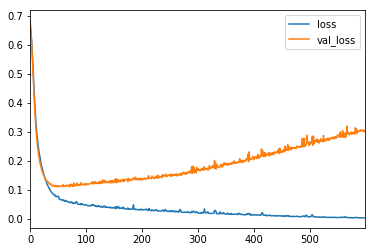

In [42]:
model_loss.plot()

#Note the over-fitting!

## Early Stopping to Stop Over Fitting

In [51]:
#redefine the model again form above

model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [52]:
#Early stopping to track the val_loss and stop training 
##once it begins increasing too much

from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [53]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [54]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6988 - val_loss: 0.6827
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6695 - val_loss: 0.6599
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6444 - val_loss: 0.6307
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6103 - val_loss: 0.5906
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5686 - val_loss: 0.5437
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5206 - val_loss: 0.4948
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4738 - val_loss: 0.4466
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4288 - val_loss: 0.4026
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3870 - val_loss: 0.3613
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3463 - val_loss: 0.3209
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0527 - val_loss: 0.1126
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.1169
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0530 - val_loss: 0.1094
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0514 - val_loss: 0.1142
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0517 - val_loss: 0.1101
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0524 - val_loss: 0.1074
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0522 - val_loss: 0.1172
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0532 - val_loss: 0.1118
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0502 - val_loss: 0.1096
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0495 - val_loss: 0.1144
Epoch 93/600


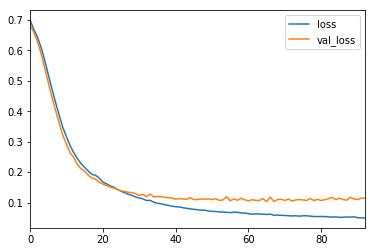

In [55]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Adding in DropOut Layers with Early Stopping to Reduce Over Fitting

In [56]:
from tensorflow.keras.layers import Dropout

In [57]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5)) #percentage of neurons turned off randomly

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [58]:
#fit with early stopping

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.7218 - val_loss: 0.6798
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.7011 - val_loss: 0.6678
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6611 - val_loss: 0.6549
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6766 - val_loss: 0.6411
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6565 - val_loss: 0.6268
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6473 - val_loss: 0.6111
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6320 - val_loss: 0.5963
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6067 - val_loss: 0.5784
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5880 - val_loss: 0.5532
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5229
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1293 - val_loss: 0.1067
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1546 - val_loss: 0.0994
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1224 - val_loss: 0.1094
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1187 - val_loss: 0.1079
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1050 - val_loss: 0.1022
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1363 - val_loss: 0.0982
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1332 - val_loss: 0.1035
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1247 - val_loss: 0.1074
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1173 - val_loss: 0.0988
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1281 - val_loss: 0.1004
Epoch 93/600


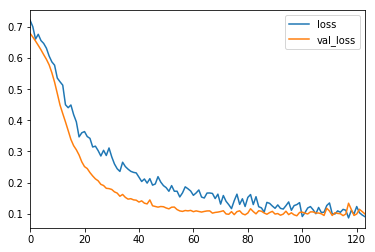

In [59]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

#Note the improvement where both are flattening out

# Model Evaluation

In [61]:
#model.predict_classes(X_test)

In [62]:
predictions = model.predict_classes(X_test)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
#compare actual Vs predictions
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [66]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
